EMNIST

In [1]:
# ✅ Start fresh, no GPU, no extra libraries
!pip install torchvision --quiet

import torchvision
from torchvision.datasets import EMNIST
import torchvision.transforms as transforms
import torch
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# ✅ Load EMNIST digits only (reduced size)
transform = transforms.Compose([transforms.ToTensor()])
train = EMNIST(root='./data', split='digits', train=True, download=True, transform=transform)
test = EMNIST(root='./data', split='digits', train=False, download=True, transform=transform)

x_train = train.data[:10000].numpy().reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(train.targets[:10000].numpy(), 10)
x_test = test.data[:2000].numpy().reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_test = to_categorical(test.targets[:2000].numpy(), 10)

print("✅ Data ready")

# ✅ Build simple CNN
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.6 MB/s eta 0:00:00


100%|██████████| 562M/562M [00:06<00:00, 82.7MB/s]


✅ Data ready
Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.6348 - loss: 1.3011 - val_accuracy: 0.9130 - val_loss: 0.2894
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9285 - loss: 0.2501 - val_accuracy: 0.9350 - val_loss: 0.2340
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9463 - loss: 0.1880 - val_accuracy: 0.9405 - val_loss: 0.2077


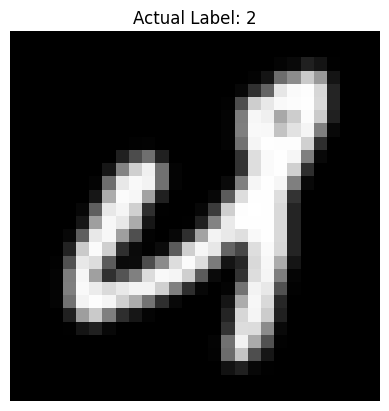

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
🔮 Predicted Label: 2


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Pick a random test digit
i = np.random.randint(0, len(x_test))
img = x_test[i].reshape(28, 28)

plt.imshow(img, cmap='gray')
plt.title("Actual Label: " + str(np.argmax(y_test[i])))
plt.axis('off')
plt.show()

# Predict using the model
pred = model.predict(x_test[i].reshape(1, 28, 28, 1))
print("🔮 Predicted Label:", np.argmax(pred))


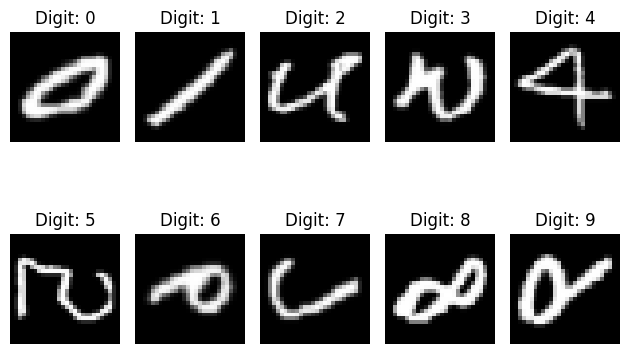

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Plot 1 example of each digit
for digit in range(10):
    idx = np.where(np.argmax(y_train, axis=1) == digit)[0][0]
    img = x_train[idx].reshape(28, 28)
    plt.subplot(2, 5, digit + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Digit: {digit}")
    plt.axis('off')

plt.tight_layout()
plt.show()
